In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [293]:
#Leyendo DataSets
# Optimización de la lectura de los datasets, eliminando la columna 'Unnamed: 0' directamente
df_1 = pd.read_csv("./estadisticas_peleador_limpio.csv", index_col=0)
df_2 = pd.read_csv("./Enfrentamientos_limpio.csv", index_col=0)
df_3 = pd.read_csv("./Categorias_por_peso.csv", index_col=0)



In [294]:
df_1.head()


,Nombre,Pais,Victorias,Derrotas,Altura,Peso,Alcance,Guardia,Edad,Golpes_min,Golpes_acer,Golpes_abs,Golpes_def,Derribos_med,Derribos_acer,Derribos_def,Sumision_int
0,Amanda Ribas,Brasil,12.0,5.0,160.02,56.70,167.64,Ortodoxo,30.0,4.63,0.40,3.40,0.61,2.07,0.51,0.85,0.7
1,Rose Namajunas,Estados Unidos,13.0,6.0,165.10,56.70,165.10,Ortodoxo,31.0,3.69,0.41,3.51,0.63,1.38,0.47,0.59,0.5
2,Justin Tafa,Nueva Zelanda,7.0,4.0,182.88,119.75,187.96,Zurdo,30.0,4.09,0.54,5.02,0.47,0.00,0.00,0.50,0.0
3,Edmen Shahbazyan,Estados Unidos,13.0,4.0,187.96,83.91,190.50,Ortodoxo,26.0,3.60,0.52,4.09,0.45,2.24,0.38,0.63,0.6
4,Payton Talbott,Estados Unidos,8.0,0.0,177.80,61.23,177.80,Ambidiestro,25.0,8.05,0.54,3.58,0.51,0.00,0.00,0.90,0.5


In [295]:
df_2.head()

,Evento,Día,Donde,Ganador,Perdedor,Division,Metodo,Detalles,Round,Tiempo
0,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Edmen Shahbazyan,AJ Dobson,Peso Medio,KO/TKO,Golpes,1.0,4:33
1,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Payton Talbott,Cameron Saaiman,Peso Gallo,KO/TKO,Golpes,2.0,0:21
2,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Youssef Zalal,Billy Quarantillo,Peso Pluma,SUB,Estrangulación Trasera,2.0,1:50
3,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Fernando Padilla,Luis Pajuelo,Peso Pluma,SUB,Estrangulación D'Arce,1.0,2:45
4,UFC Fight Night: Ribas vs. Namajunas,3/23/2024,"Las Vegas, Nevada, USA",Julian Erosa,Ricardo Ramos,Peso Pluma,SUB,Estrangulación Guillotina,1.0,2:15


In [296]:
df_3.head()

,Division,Peso (kg)
0,Peso Medio,Hasta 84 kg
1,Peso Gallo,Hasta 61.2 kg
2,Peso Pluma,Hasta 65.8 kg
3,Peso Pesado,Hasta 120.2 kg
4,Peso Gallo Femenino,Hasta 61.2 kg


# Resolucion de hipotesis:
1. Relación entre la guardia y el Éxito en ambos géneros 🤼



In [297]:
df_1_filtro = df_1[['Nombre', 'Guardia']]
df_2_filtro = df_2[['Ganador', 'Perdedor']]

In [298]:
ganadores = pd.merge(df_2_filtro, df_1_filtro, left_on='Ganador', right_on='Nombre', how='left')  #Merge
ganadores = ganadores[['Ganador', 'Guardia']].rename(columns={'Guardia': 'Guardia_ganador'})      #Cambiar nombre

perdedores = pd.merge(df_2_filtro, df_1_filtro, left_on='Perdedor', right_on='Nombre', how='left') #Merge
perdedores = perdedores[['Perdedor', 'Guardia']].rename(columns={'Guardia': 'Guardia_perdedor'})   #Cambiar nombre

df_combinado = pd.merge(ganadores, perdedores, left_index=True, right_index=True)                             #Combinar
df_combinado = df_combinado.dropna(subset=['Ganador', 'Guardia_ganador', 'Perdedor', 'Guardia_perdedor'])     #Eliminar NaN's

df_combinado

,Ganador,Guardia_ganador,Perdedor,Guardia_perdedor
1,Payton Talbott,Ambidiestro,Cameron Saaiman,Zurdo
2,Youssef Zalal,Ambidiestro,Billy Quarantillo,Ortodoxo
4,Julian Erosa,Zurdo,Ricardo Ramos,Ortodoxo
5,Marcin Tybura,Ortodoxo,Tai Tuivasa,Zurdo
6,Macy Chiasson,Ortodoxo,Pannie Kianzad,Ortodoxo
...,...,...,...,...
3015,Jon Jones,Ortodoxo,Brandon Vera,Ortodoxo
3070,Vitor Belfort,Zurdo,Rich Franklin,Zurdo
3078,Nate Diaz,Zurdo,Melvin Guillard,Ortodoxo
3177,Jeremy Stephens,Ortodoxo,Rafael Dos Anjos,Zurdo


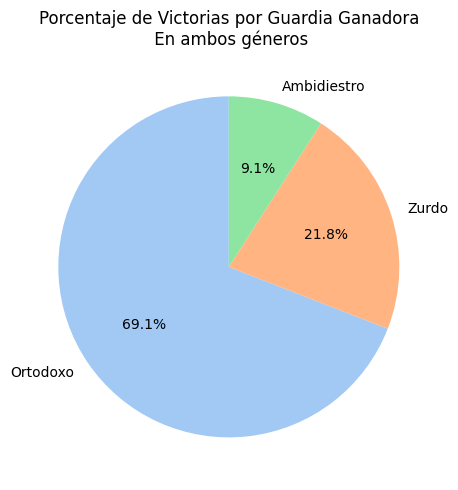

In [299]:
contador_guardias = df_combinado['Guardia_ganador'].value_counts()

porcentajes_guardias = (contador_guardias / contador_guardias.sum()) * 100

plt.figure(figsize=(5, 5))
plt.pie(porcentajes_guardias, labels=porcentajes_guardias.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title("Porcentaje de Victorias por Guardia Ganadora\n En ambos géneros")

plt.tight_layout()
plt.show()


#Dato Curioso: La prevalencia de zurdos en el mundo es del 10,6 %,

2. Probabilidad de ganar respecto a una buena defensa de derribo? 🥋


In [300]:
df_1_filtro = df_1[['Victorias', 'Derrotas','Derribos_def']]

In [310]:
df_1_filtro.loc[:,'Total_Peleas'] = df_1_filtro['Victorias'] + df_1_filtro['Derrotas']
df_1_filtro.loc[:,'Probabilidad_Ganar'] = df_1_filtro['Victorias'] / df_1_filtro['Total_Peleas']

umbral_defensa = 0.6                                            
df_buena_defensa = df_1_filtro[df_1_filtro['Derribos_def'] >= umbral_defensa]

probabilidad_promedio_ganar = df_buena_defensa['Probabilidad_Ganar'].mean()
print(f"Probabilidad promedio de ganar con buena defensa de derribos: {(round(probabilidad_promedio_ganar,2))*100} %")


Probabilidad promedio de ganar con buena defensa de derribos: 75.0 %


3. Rendimiento por Género 🚺🤼‍♂️


Del 1er dataset:
wins (número de victorias)
name (nombre del luchador)


Del 2do dataset:
r_fighter, b_fighter (relacionar con name)
method, method_detailed (para analizar métodos de finalización)
weight_class (para identificar si la pelea fue en una división masculina o femenina)


Del 3er dataset:
division (para categorizar entre divisiones femeninas y masculinas)



4. Diferencia de Edades 👵👦

Del 1er dataset:
age (edad del luchador)
name (nombre del luchador)

Del 2do dataset:
r_fighter, b_fighter (nombres de los luchadores)
method, status (resultado de la pelea para saber quién ganó)

5. Knockouts en diferentes Divisiones 🥊

Del 2do dataset:
weight_class (categoría de peso)
method (para identificar si fue un knockout)
r_str, b_str (golpes lanzados por los luchadores)


Del 3er dataset:
division (para identificar el tipo de división)

6. EXTRA: Altura y Resultados de Pelea 📏🏆

Del 1er dataset:
height (altura del luchador)
name (nombre del luchador)


Del 2do dataset:
r_fighter, b_fighter (nombres de los luchadores)
status (resultado de la pelea para saber quién ganó)

&nbsp;

&nbsp;